<a href="https://colab.research.google.com/github/salmazahrara/2025_VISI_KOMPUTER_TI2A/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


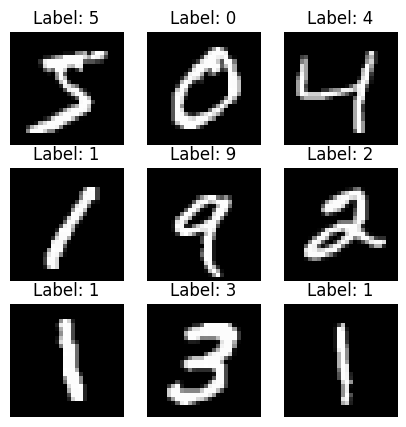

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9) :
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

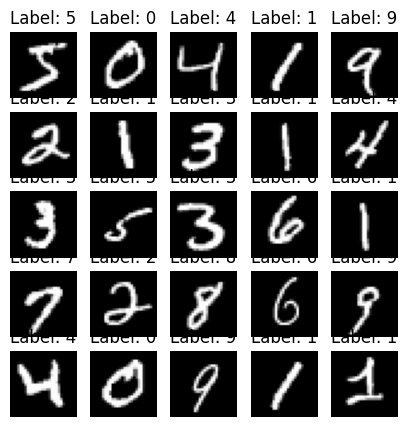

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# harus mengubah subplot juga agar kolom dan baris sinkron

Praktikum D2 - Klasifikasi Gambar dengan Model Mechine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len (x_train), -1) / 255.0
x_test_flat = x_test.reshape(len (x_test),-1) / 255.0

# SVM

clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # menggunakan subset karena svm berat
y_pred = clf.predict(x_test_flat)

print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 0.9101


In [ ]:
# Tugas kecil mengubah dari linear ke rbf
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len (x_train), -1) / 255.0
x_test_flat = x_test.reshape(len (x_test),-1) / 255.0

# SVM

clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # menggunakan subset karena svm berat
y_pred = clf.predict(x_test_flat)

print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 0.9513


Praktikum D3 - Mmembangun CNN Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8966 - loss: 0.3417 - val_accuracy: 0.9812 - val_loss: 0.0728
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9801 - loss: 0.0637 - val_accuracy: 0.9842 - val_loss: 0.0610
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9847 - val_loss: 0.0597
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9916 - loss: 0.0275 - val_accuracy: 0.9877 - val_loss: 0.0527
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9935 - loss: 0.0196 - val_accuracy: 0.9882 - val_loss: 0.0500


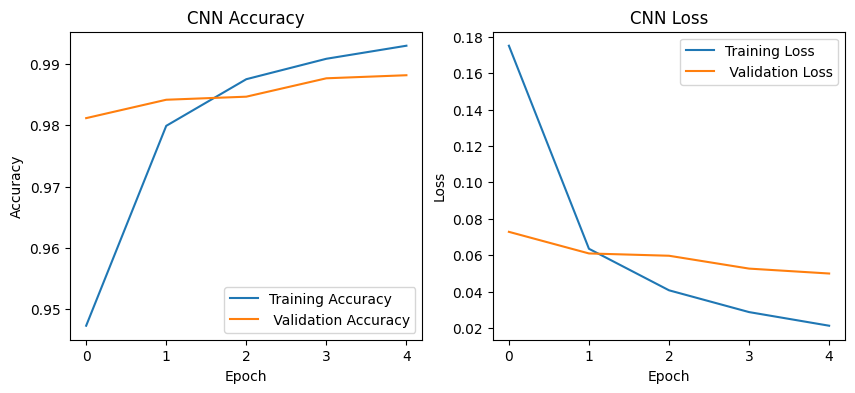

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi dan reshape untuk CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0


model = models.Sequential([
    layers.Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history ======
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label=' Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label=' Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 32ms/step - accuracy: 0.8948 - loss: 0.3337 - val_accuracy: 0.9857 - val_loss: 0.0500
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9825 - val_loss: 0.0649
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 31ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9872 - val_loss: 0.0397
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9912 - val_loss: 0.0354


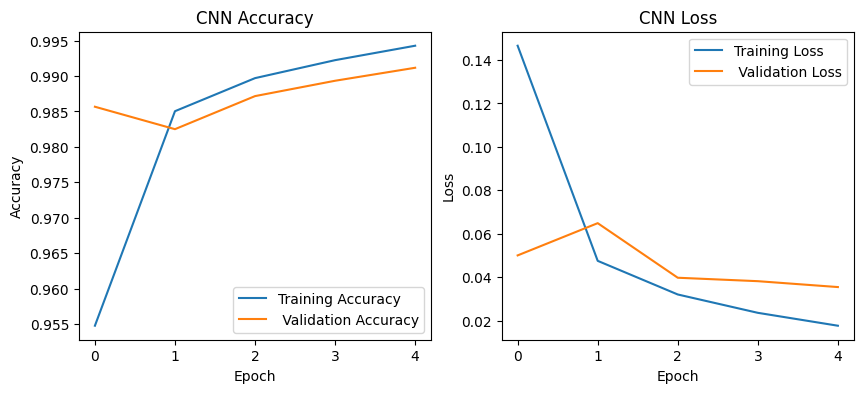

In [8]:
# Tugas kecil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi dan reshape untuk CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0


model = models.Sequential([
    layers.Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history ======
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label=' Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label=' Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.3675 - loss: 1.7324 - val_accuracy: 0.5472 - val_loss: 1.2686
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.5839 - loss: 1.1833 - val_accuracy: 0.6376 - val_loss: 1.0485
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6493 - loss: 1.0088 - val_accuracy: 0.6584 - val_loss: 1.0023
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6877 - loss: 0.9006 - val_accuracy: 0.6804 - val_loss: 0.9405
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 45ms/step - accuracy: 0.7141 - loss: 0.8310 - val_accuracy: 0.6880 - val_loss: 0.9338
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - accuracy: 0.7340 - loss: 0.7703 - val_accuracy: 0.7034 - val_loss: 0.8828
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7560 - loss: 0.7125 - val_accuracy: 0.7050 - val_loss: 0.8882
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.7601 -

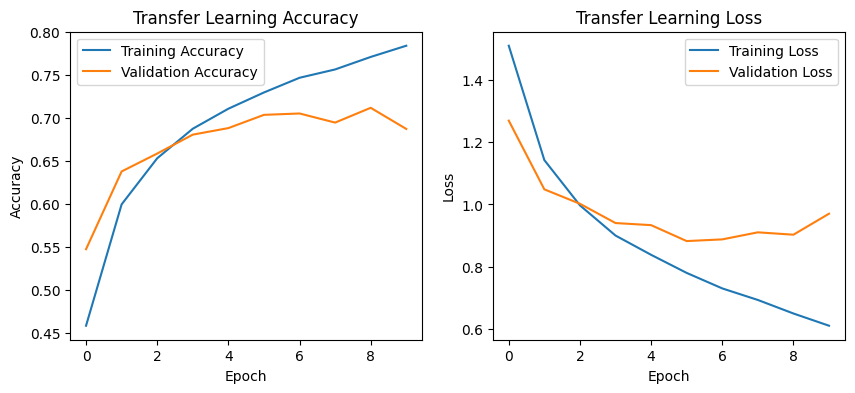

In [7]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.2740 - loss: 1.9507 - val_accuracy: 0.5134 - val_loss: 1.4091
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.4570 - loss: 1.5015 - val_accuracy: 0.5674 - val_loss: 1.2402
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.5076 - loss: 1.3757 - val_accuracy: 0.5748 - val_loss: 1.2242
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.5324 - loss: 1.2969 - val_accuracy: 0.6142 - val_loss: 1.1056
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.5658 - loss: 1.2231 - val_accuracy: 0.6456 - val_loss: 1.0104
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.5862 - loss: 1.1691 - val_accuracy: 0.6534 - val_loss: 1.0070
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 104s 54ms/step - accuracy: 0.6020 - loss: 1.1202 - val_accuracy: 0.6570 - val_loss: 0.9766
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.6191 

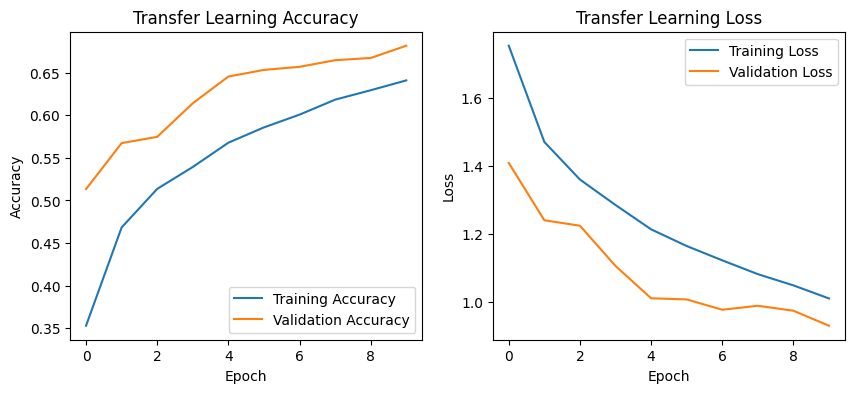

In [10]:
# Tugas Kecil

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



Praktikum D5 - Tranfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 590s 418ms/step - accuracy: 0.4591 - loss: 1.5570 - val_accuracy: 0.5776 - val_loss: 1.2161
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 631s 424ms/step - accuracy: 0.5762 - loss: 1.2070 - val_accuracy: 0.5764 - val_loss: 1.1845
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 609s 415ms/step - accuracy: 0.6024 - loss: 1.1394 - val_accuracy: 0.5966 - val_loss: 1.1502
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 621s 415ms/step - accuracy: 0.6159 - loss: 1.0932 - val_accuracy: 0.6088 - val_loss: 1.1347
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 626s 417ms/step - accuracy: 0.6262 - loss: 1.0710 - val_accuracy: 0.6120 - val_loss: 1.1133


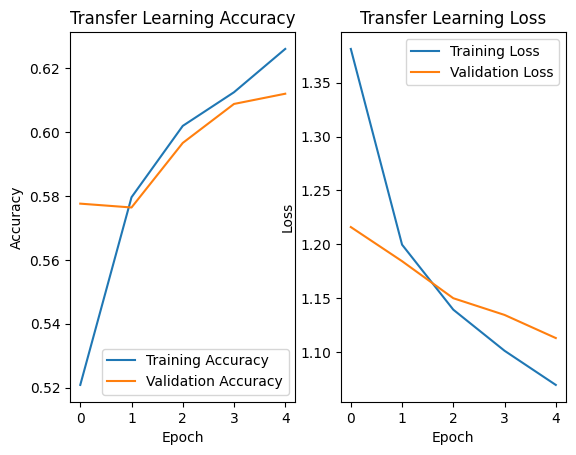

In [13]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot History =====
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 776s 550ms/step - accuracy: 0.5060 - loss: 1.4128 - val_accuracy: 0.6100 - val_loss: 1.0990
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 698s 477ms/step - accuracy: 0.6300 - loss: 1.0540 - val_accuracy: 0.6196 - val_loss: 1.0641
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 672s 477ms/step - accuracy: 0.6587 - loss: 0.9697 - val_accuracy: 0.6490 - val_loss: 1.0108
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 670s 469ms/step - accuracy: 0.6751 - loss: 0.9184 - val_accuracy: 0.6594 - val_loss: 0.9808
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 664s 472ms/step - accuracy: 0.6940 - loss: 0.8684 - val_accuracy: 0.6554 - val_loss: 1.0020


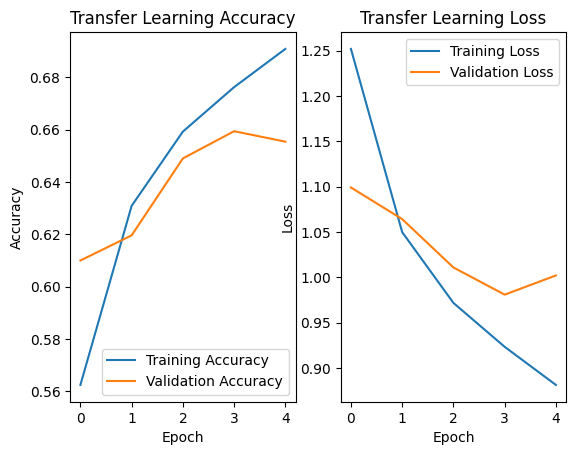

In [14]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

for layer in base_model.layers[:-2]:
    layer.trainable = False
for layer in base_model.layers[-2:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot History =====
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Praktikum D6 - Evalusi dengan Confusion Matrix dan Metrik lain


313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 366ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.85      0.63      0.72      1000
           2       0.81      0.35      0.49      1000
           3       0.48      0.46      0.47      1000
           4       0.47      0.75      0.58      1000
           5       0.52      0.63      0.57      1000
           6       0.74      0.66      0.70      1000
           7       0.70      0.75      0.73      1000
           8       0.88      0.67      0.76      1000
           9       0.68      0.77      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.65     10000
weighted avg       0.68      0.65      0.65     10000



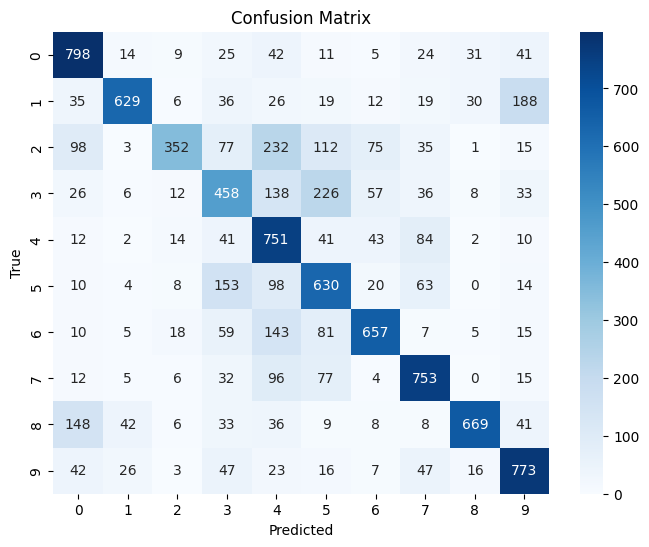

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi
y_pred = model.predict(x_test).argmax(axis=1)

# Laporan klasifikasi
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


TUGAS PRAKTIKUM SVM

In [19]:
# LATIHAN D2 – SVM dengan MNIST

from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# 1. Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Flatten 28x28 → 784
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# 3. Gunakan subset lebih kecil biar cepat (contoh: 1000 sampel)
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:1000], y_train[:1000].ravel())

# 4. Prediksi & evaluasi
y_pred = clf.predict(x_test_flat)
print("Akurasi (linear, subset 1000):", accuracy_score(y_test, y_pred))


Akurasi (linear, subset 1000): 0.8758


PRAKTIKUM PREDIKSI SVM

In [52]:
# PREDIKSI SVM

from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1) float [0,1]
    x_flat = x.reshape(1, -1)                   # (1,784)

    # Prediksi dengan SVM
    pred = int(clf.predict(x_flat)[0])

    # Ambil probabilitas kalau clf dilatih dengan probability=True
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    # Tampilkan hasil
    if conf is not None:
        print(f"{fname} -> Prediksi SVM: {pred} (p≈{conf:.2f})")
    else:
        print(f"{fname} -> Prediksi SVM: {pred}")


5 (2).jpg -> Prediksi SVM: 2


In [53]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """

    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bounding box digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving 5.jpg to 5 (3).jpg


In [54]:
from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1) float [0,1]
    x_flat = x.reshape(1, -1)                   # (1,784)

    # Prediksi dengan SVM
    pred = int(clf.predict(x_flat)[0])

    # Ambil probabilitas kalau clf dilatih dengan probability=True
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    # Tampilkan hasil
    if conf is not None:
        print(f"{fname} -> Prediksi SVM: {pred} (p≈{conf:.2f})")
    else:
        print(f"{fname} -> Prediksi SVM: {pred}")


5 (3).jpg -> Prediksi SVM: 2


In [55]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """

    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit jadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bounding box digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving 0.jpg to 0 (1).jpg


In [56]:
from sklearn.metrics import accuracy_score
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1) float [0,1]
    x_flat = x.reshape(1, -1)                   # (1,784)

    # Prediksi dengan SVM
    pred = int(clf.predict(x_flat)[0])

    # Ambil probabilitas kalau clf dilatih dengan probability=True
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    # Tampilkan hasil
    if conf is not None:
        print(f"{fname} -> Prediksi SVM: {pred} (p≈{conf:.2f})")
    else:
        print(f"{fname} -> Prediksi SVM: {pred}")


0 (1).jpg -> Prediksi SVM: 9


In [27]:
# Praktikum CNN

In [28]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

# Bangun CNN sederhana
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training cepat (3 epoch saja biar gak lama)
model.fit(x_train_cnn[:20000], y_train[:20000], epochs=3, validation_split=0.1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8459 - loss: 0.4987 - val_accuracy: 0.9630 - val_loss: 0.1210
Epoch 2/3
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9764 - loss: 0.0746 - val_accuracy: 0.9745 - val_loss: 0.0798
Epoch 3/3
563/563 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.9869 - loss: 0.0401 - val_accuracy: 0.9780 - val_loss: 0.0707


Saving 5.jpg to 5.jpg


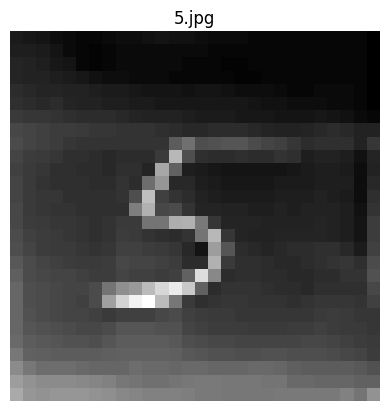

✅ Preprocessing selesai. Siap diprediksi dengan CNN.


In [32]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)         # tingkatkan kontras
    arr = np.array(img).astype(np.uint8)

    # invert kalau background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    # resize ke 28x28
    img = img.resize((28,28))
    arr = np.array(img).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return img, arr

# Simpan hasil preprocess
preprocessed = {}
for fname, data in uploaded.items():
    img_pil = Image.open(BytesIO(data))
    disp, arr = preprocess_to_mnist_28x28(img_pil)
    preprocessed[fname] = (disp, arr)

    plt.imshow(disp, cmap='gray')
    plt.title(fname)
    plt.axis('off')
    plt.show()

print("✅ Preprocessing selesai. Siap diprediksi dengan CNN.")


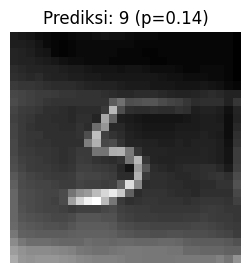

Rekap Prediksi (CNN):
- 5.jpg -> 9 (p=0.140)


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    # Ambil gambar dari file upload
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: gambar utk display, x: (28,28,1)

    # Siapkan batch input (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN
    probs = model.predict(x_batch, verbose=0)[0]   # output shape (10,)
    pred = int(np.argmax(probs))                   # ambil label dengan probabilitas tertinggi
    conf = float(np.max(probs))                    # ambil nilai probabilitas tertinggi

    results.append((fname, pred, conf))

    # Tampilkan hasil prediksi per gambar
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# === Rekap semua hasil ===
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


Saving 4.jpeg to 4.jpeg


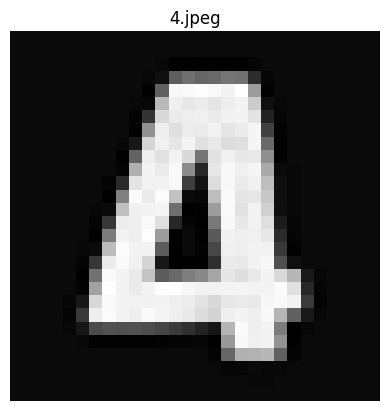

✅ Preprocessing selesai. Siap diprediksi dengan CNN.


In [36]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)         # tingkatkan kontras
    arr = np.array(img).astype(np.uint8)

    # invert kalau background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    # resize ke 28x28
    img = img.resize((28,28))
    arr = np.array(img).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return img, arr

# Simpan hasil preprocess
preprocessed = {}
for fname, data in uploaded.items():
    img_pil = Image.open(BytesIO(data))
    disp, arr = preprocess_to_mnist_28x28(img_pil)
    preprocessed[fname] = (disp, arr)

    plt.imshow(disp, cmap='gray')
    plt.title(fname)
    plt.axis('off')
    plt.show()

print("✅ Preprocessing selesai. Siap diprediksi dengan CNN.")


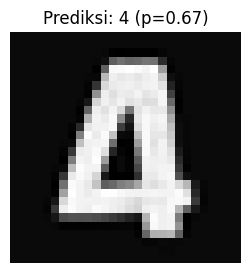

Rekap Prediksi (CNN):
- 4.jpeg -> 4 (p=0.671)


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    # Ambil gambar dari file upload
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: gambar utk display, x: (28,28,1)

    # Siapkan batch input (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN
    probs = model.predict(x_batch, verbose=0)[0]   # output shape (10,)
    pred = int(np.argmax(probs))                   # ambil label dengan probabilitas tertinggi
    conf = float(np.max(probs))                    # ambil nilai probabilitas tertinggi

    results.append((fname, pred, conf))

    # Tampilkan hasil prediksi per gambar
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# === Rekap semua hasil ===
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


Saving 9.jpeg to 9.jpeg


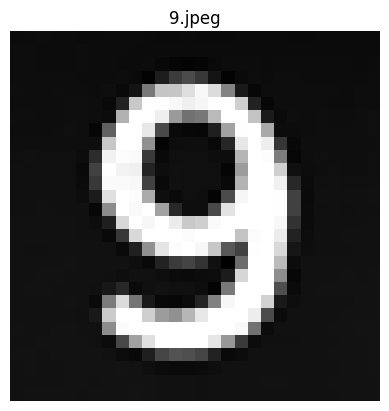

✅ Preprocessing selesai. Siap diprediksi dengan CNN.


In [38]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)         # tingkatkan kontras
    arr = np.array(img).astype(np.uint8)

    # invert kalau background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    # resize ke 28x28
    img = img.resize((28,28))
    arr = np.array(img).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return img, arr

# Simpan hasil preprocess
preprocessed = {}
for fname, data in uploaded.items():
    img_pil = Image.open(BytesIO(data))
    disp, arr = preprocess_to_mnist_28x28(img_pil)
    preprocessed[fname] = (disp, arr)

    plt.imshow(disp, cmap='gray')
    plt.title(fname)
    plt.axis('off')
    plt.show()

print("✅ Preprocessing selesai. Siap diprediksi dengan CNN.")


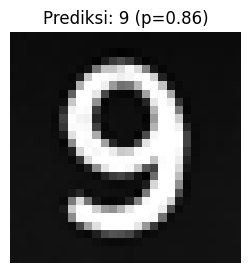

Rekap Prediksi (CNN):
- 9.jpeg -> 9 (p=0.856)


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    # Ambil gambar dari file upload
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: gambar utk display, x: (28,28,1)

    # Siapkan batch input (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN
    probs = model.predict(x_batch, verbose=0)[0]   # output shape (10,)
    pred = int(np.argmax(probs))                   # ambil label dengan probabilitas tertinggi
    conf = float(np.max(probs))                    # ambil nilai probabilitas tertinggi

    results.append((fname, pred, conf))

    # Tampilkan hasil prediksi per gambar
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# === Rekap semua hasil ===
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


Saving 2.jpg to 2.jpg


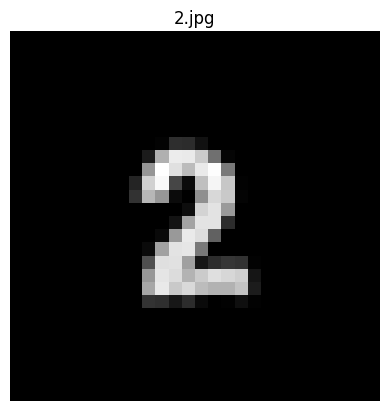

✅ Preprocessing selesai. Siap diprediksi dengan CNN.


In [40]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)         # tingkatkan kontras
    arr = np.array(img).astype(np.uint8)

    # invert kalau background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    # resize ke 28x28
    img = img.resize((28,28))
    arr = np.array(img).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return img, arr

# Simpan hasil preprocess
preprocessed = {}
for fname, data in uploaded.items():
    img_pil = Image.open(BytesIO(data))
    disp, arr = preprocess_to_mnist_28x28(img_pil)
    preprocessed[fname] = (disp, arr)

    plt.imshow(disp, cmap='gray')
    plt.title(fname)
    plt.axis('off')
    plt.show()

print("✅ Preprocessing selesai. Siap diprediksi dengan CNN.")


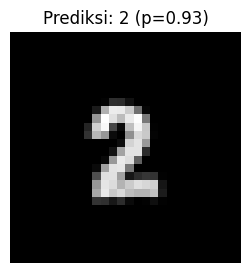

Rekap Prediksi (CNN):
- 2.jpg -> 2 (p=0.933)


In [41]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    # Ambil gambar dari file upload
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: gambar utk display, x: (28,28,1)

    # Siapkan batch input (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN
    probs = model.predict(x_batch, verbose=0)[0]   # output shape (10,)
    pred = int(np.argmax(probs))                   # ambil label dengan probabilitas tertinggi
    conf = float(np.max(probs))                    # ambil nilai probabilitas tertinggi

    results.append((fname, pred, conf))

    # Tampilkan hasil prediksi per gambar
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# === Rekap semua hasil ===
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


Saving 5.jpg to 5 (1).jpg


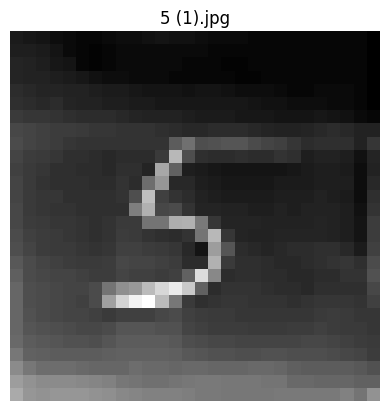

✅ Preprocessing selesai. Siap diprediksi dengan CNN.


In [44]:
from google.colab import files
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

uploaded = files.upload()

def preprocess_to_mnist_28x28(img_pil):
    img = img_pil.convert('L')               # grayscale
    img = ImageOps.autocontrast(img)         # tingkatkan kontras
    arr = np.array(img).astype(np.uint8)

    # invert kalau background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)

    # resize ke 28x28
    img = img.resize((28,28))
    arr = np.array(img).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return img, arr

# Simpan hasil preprocess
preprocessed = {}
for fname, data in uploaded.items():
    img_pil = Image.open(BytesIO(data))
    disp, arr = preprocess_to_mnist_28x28(img_pil)
    preprocessed[fname] = (disp, arr)

    plt.imshow(disp, cmap='gray')
    plt.title(fname)
    plt.axis('off')
    plt.show()

print("✅ Preprocessing selesai. Siap diprediksi dengan CNN.")


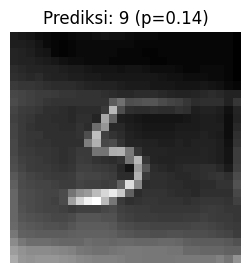

Rekap Prediksi (CNN):
- 5 (1).jpg -> 9 (p=0.140)


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

results = []

for fname in uploaded.keys():
    # Ambil gambar dari file upload
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: gambar utk display, x: (28,28,1)

    # Siapkan batch input (1,28,28,1)
    x_batch = np.expand_dims(x, axis=0)

    # Prediksi dengan CNN
    probs = model.predict(x_batch, verbose=0)[0]   # output shape (10,)
    pred = int(np.argmax(probs))                   # ambil label dengan probabilitas tertinggi
    conf = float(np.max(probs))                    # ambil nilai probabilitas tertinggi

    results.append((fname, pred, conf))

    # Tampilkan hasil prediksi per gambar
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# === Rekap semua hasil ===
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
